In [261]:
# import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

from matplotlib import pyplot

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

In [262]:
# df = pd.read_pickle("Train.pkl")
df = pd.read_csv("diaTraining.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('d')

# testdf = pd.read_pickle("Test.pkl")
testdf = pd.read_csv("diaTest.csv")
testdf['Date'] = pd.to_datetime(testdf['Date'])
testdf.set_index('Date', inplace=True)
testdf = testdf.asfreq('d')

test = testdf['Target'].copy()
train = df['Target'].copy()

In [264]:
model = ARIMA(train, order=(10,0,10),
              missing='drop')
model_fit = model.fit(disp=0)

In [265]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 Target   No. Observations:                  502
Model:                   ARMA(10, 10)   Log Likelihood                1593.113
Method:                       css-mle   S.D. of innovations              0.010
Date:                Mon, 15 Jun 2020   AIC                          -3142.226
Time:                        23:49:13   BIC                          -3049.417
Sample:                             0   HQIC                         -3105.814
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      0.768      0.443      -0.001       0.001
ar.L1.Target      0.1725        nan        nan        nan         nan         nan
ar.L2.Target     -0.0928        nan     

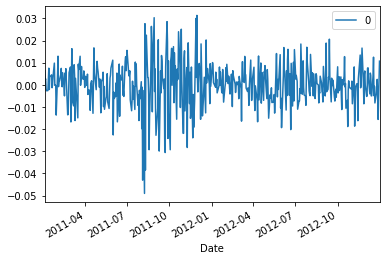

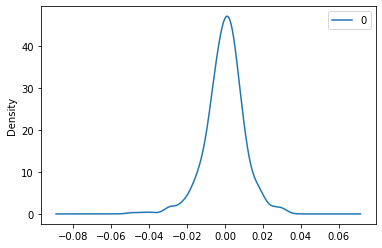

                0
count  502.000000
mean     0.000002
std      0.010126
min     -0.049028
25%     -0.005033
50%      0.000446
75%      0.005534
max      0.031356


In [266]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

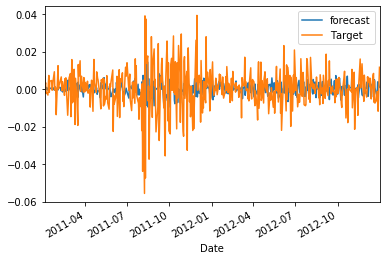

In [267]:
model_fit.plot_predict(dynamic=False)
plt.show()

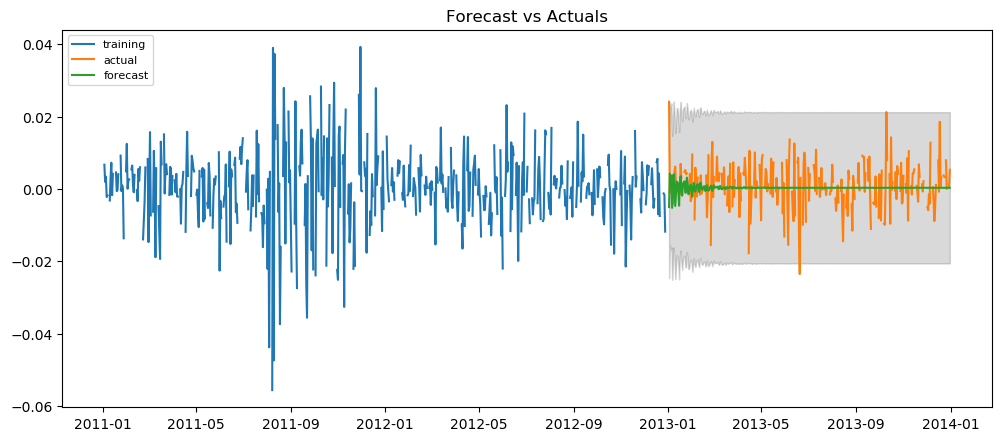

In [268]:
# Forecast
fc, se, conf = model_fit.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()